# Car Price Analysis and Prediction

Automobile companies require a robust model for the market price given a set of independent variables. It will be utilized by the management to determine how the market will fluctuate in relation to these independent factors. In effect, engineers may then change the design of the automobiles, the business strategy, and so on to meet particular pricing points. Furthermore, the model would help management comprehend the price dynamics of a new market.

## Explanatory Features
1. ID:A unique identification of each car specification
2. Symbolling: A risk assessment scale that is related to the price. A value of +3 indicates that the auto is risky and -3 implies that it is safe. 
3. Car Name: The specific brand and model of the car
4. Fuel Type: The type of fuel the car uses. A car, depending on its engine, may either use gasoline or diesel.
5. Aspiration: The aspiration of a vehicle refers to the specific mechanism of drawing air for internal combustion in the engine. There are three general types: natural, turbocharger, and supercharger.
6. Car Body: The car body refers to the physical form of the car. The data set includes four types of variants: convertible, hatchback, sedan, wagon, and hardtop.
7. Drive Wheel: The drive wheel is the wheel and tire assembly that pushes or pulls vehicle down the road. In general, a vehicle can have a front wheel drive, rear wheel drive, 4-wheel drive, and an all-wheel drive.
8. Engine Location: An engine can be placed at the front or at the rear of the car.
9. Wheelbase: The wheelbase is the horizontal distance between the centers of the front and rear wheels. 
10. Car Length: The attribute referring to the length of the vehicle
11. Car Width: The attribute referring to the width of the vehicle
12. Car Height: The attribute referring to the height of the vehicle
13. Curb Weight: The total weight of the car, including a full tank of fuel and standard equipment. This, however, excludes any passengers or extra equipment.
14. Engine Type: The specific configuration of the car engine. The dataset is mainly comprised with different variants of overhead camshaft engine.
15. Cylinder Number: The number of cylinders contained in the engine.
16. Engine Size: The general dimensions of the engine.
17. Fuel System: A system that manages delivering fuel to the engine as needed. This part is made of the fuel tank, pump, filter, and injectors.
18. Bore Ratio: The attribute refers to half of the diameter of the cylinder.
19. Stroke: A phase of the engine's cycle during which the piston travels from top to bottom or vice versa.
20. Compression Ratio: This is the ratio between the volume of the cylinder and combustion chamber in an internal combustion engine at their maximum and minimum values.
21. Horsepower: The attribute refers to the power an engine can produce.
22. Peak RPM: The fastest operation of an automobile at a given point in time.
23. City MPG: The lowest miles per gallon rating for a vehicle.
24. Highway MPG: The highest miles per gallon rating for a vehicle.

## Target Feature
Price:  The amount of money to be paid for a specific model of automobile.


# Importing Libraries

In [1]:
from scipy.stats import skew
from scipy.stats import chi2_contingency
from scipy import stats
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")

# Data Cleaning

In [2]:
df = pd.read_csv('dataset_9_carprice.csv')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
print('Number of Duplicate values:', df.duplicated().sum())

Number of Duplicate values: 0


For starters, the dataset contains neither null nor duplicate values. 

# Feature Engineering

Feature engineering is the process of identifying and modifying useful data characteristics from raw data in order to develop successful models. It is an effective method for improving prediction models since it entails extracting relevant information and identifying trends.

## Identifying Car Brands, Region of Production, and Degree of Configuration 

In [6]:
df.rename(columns={'symboling': 'symbolling', 'CarName': 'carname'}, inplace=True)

df['carbrand'] = df['carname'].str.split(' ', expand=True)[0]
df['carbrand'].replace({'maxda': 'mazda',
                        'toyouta': 'toyota',
                        'vokswagen': 'volkswagen',
                        'vw': 'volkswagen',
                        'Nissan': 'nissan',
                        'porcshce': 'porsche'}, inplace=True)

df['region'] = df['carbrand'].apply(lambda x: 'asia' if x in ['toyota', 'nissan', 'mitsubishi', 'mazda',
                                                              'honda', 'subaru', 'isuzu'] else 'us' if x in ['chevrolet', 'plymouth', 'buick',
                                                                                                             'dodge', 'mercury'] else 'europe' if x in ['alfa-romero', 'peugeot',
                                                                                                                                                        'audi', 'volvo',
                                                                                                                                                        'bmw', 'jaguar',
                                                                                                                                                        'porsche', 'saab',
                                                                                                                                                        'renault', 'volkswagen'] else None)

df['degree'] = df['carbrand'].apply(lambda x: 'general' if x in ['toyota', 'nissan', 'mitsubishi', 'mazda',
                                                                 'renault', 'peugeot', 'audi', 'alfa-romero',
                                                                 'volkswagen', 'volvo', 'chevrolet', 'plymouth',
                                                                 'mercury', 'honda', 'isuzu', 'subaru'] else 'luxury' if x in ['porsche', 'dodge', 'buick', 'saab',
                                                                                                                               'bmw', 'jaguar'] else None)

Car brands can be segmented further as two categories: region and degree of configuration. The region indicates the origin of the brand such as Asia, Europe, and America. On the other hand, degree of configuration refers to how sophisticated the brand is in making cars. For instance, brands that usually manufacture small, hatchback cars are known to be city cars or in the “general market”. On the other hand, cars that are made to have great power and sophisticated design are in the “luxurious” category.

## Deriving New Metrics

In [7]:
df['power-to-weight'] = df['horsepower'] / df['curbweight']
df['carvolume'] = (df['carheight'] * df['carwidth'] * df['carlength'])

Aside from the intuitive notion of car volume, the power-to-weight ratio is a measure that indicates how much power the vehicle can produce per unit weight. Therefore, if a car has a higher power output per unit weight than another vehicle, it will be able to accelerate that pound of weight more quickly.

## Removing Unnecessary Features

In [8]:
df.drop('car_ID', axis=1, inplace=True)
df.drop('carname', axis=1, inplace=True)

# Understanding Price

Price Skewness: 1.765


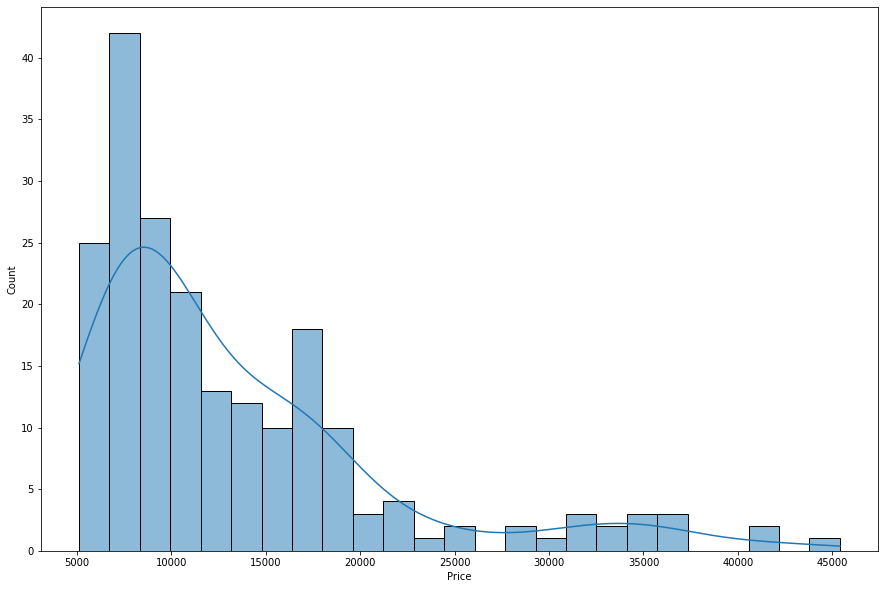

In [9]:
fig, axs = plt.subplots(figsize=(15,10))
sns.histplot(x=df['price'], bins=25, kde=True,).set(xlabel='Price')
print('Price Skewness:', round(skew(df['price']), 3))

The response variable in the dataset is the price (in $) accompanying the specific car model. The attribute has a minimum value of \\$5,118 and a maximum value of \\$45,400. The price follows a highly right-skewed distribution with a coefficient of approximately 1.765 and has a relatively high frequency between \\$5,000 to \\$10,000. Since the price distribution is skewed, it is misleading to represent it with a mean as this measure of central tendency considers every data point (even outliers in a skewed distribution). Therefore, median will be alternatively used when price is involved in the exploratory data analysis.

# Understanding Car Brand

Car brands are the titles associated for each model representing the manufacturer of a specific vehicle. The dataset contains 147 unique models based on 22 car brands. If the actual, detailed car names were to be used in machine learning, there is a possibility that the process will produce complicated models and lead to an overfit problem. Therefore, data discretization has been done to simplify the dataset, while maintaining the original semantics and logic, and formulate a comprehensible model. It also reduces memory usage and increases the speed and accuracy of various data analysis techniques.

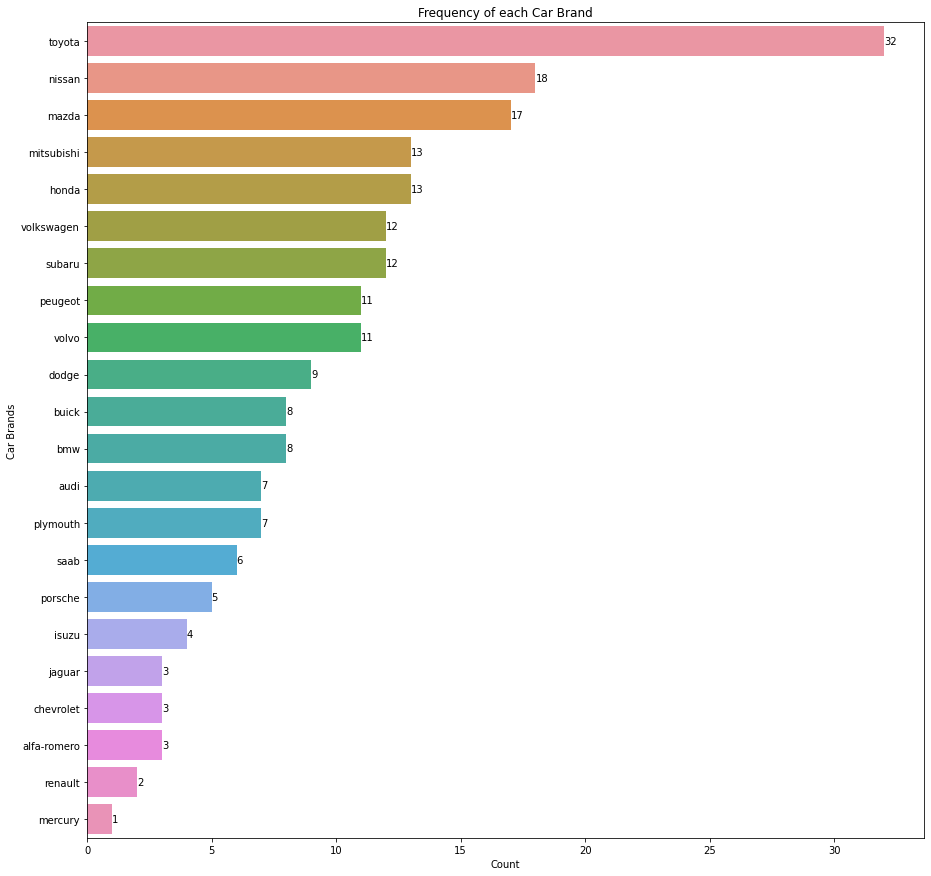

In [10]:
fig, axs = plt.subplots(figsize=(15,15))
sns.countplot(y='carbrand', orient='h', order=df['carbrand'].value_counts().index, data=df).set(xlabel='Count', ylabel='Car Brands', title='Frequency of each Car Brand')
axs.bar_label(container=axs.containers[0]);

## Describing Car Brands in terms of Region

In [11]:
print('Asian Brands:', df[df['region']=='asia']['carbrand'].unique())
print('European Brands:', df[df['region']=='europe']['carbrand'].unique())
print('American Brands:', df[df['region']=='us']['carbrand'].unique())

Asian Brands: ['honda' 'isuzu' 'mazda' 'mitsubishi' 'nissan' 'subaru' 'toyota']
European Brands: ['alfa-romero' 'audi' 'bmw' 'jaguar' 'peugeot' 'porsche' 'renault' 'saab'
 'volkswagen' 'volvo']
American Brands: ['chevrolet' 'dodge' 'buick' 'mercury' 'plymouth']


Text(0.5, 1.0, 'Frequency of Car Brands in terms Regions')

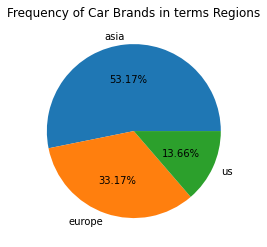

In [12]:
prop_region = df.groupby('region', as_index=False)['region'].value_counts()

plt.pie(prop_region['count'], labels=prop_region['region'], autopct='%.2f%%')
plt.title('Frequency of Car Brands in terms Regions')

It can be observed that the dataset is dominated by Asian-made cars as the five top brands in the previous countplot are all from Asia. Two of the several reasons for the "popularity" of these types of cars are due to the economic fuel intake and the relatively cheap price.

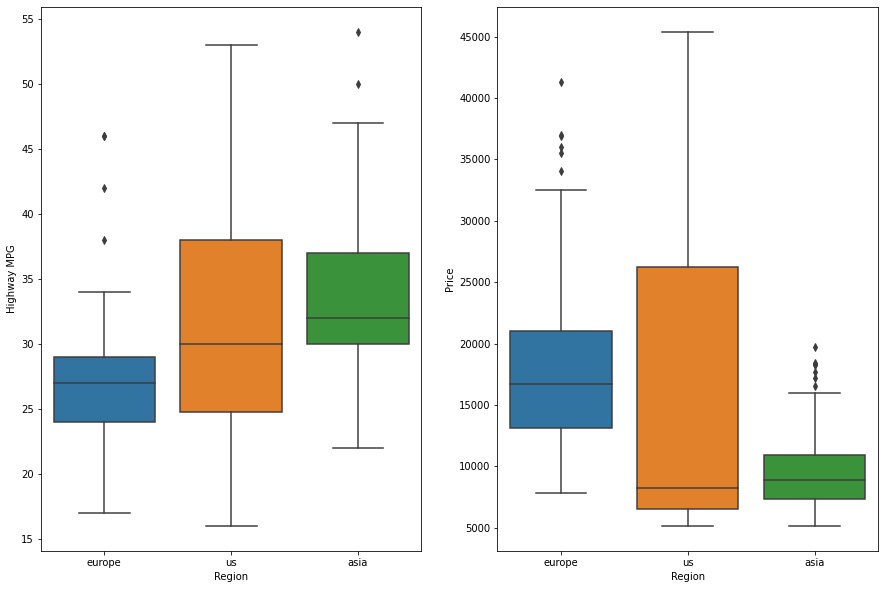

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
sns.boxplot(x='region', y='highwaympg', data=df, ax=axs[0]).set(xlabel='Region', ylabel='Highway MPG');
sns.boxplot(x='region', y='price', data=df, ax=axs[1]).set(xlabel='Region', ylabel='Price');

## Describing Car Brands in terms of Degree of Configuration

In [14]:
print('General Made Brands:', df[df['degree']=='general']['carbrand'].unique())
print('Luxury Brands:', df[df['degree']=='luxury']['carbrand'].unique())

General Made Brands: ['alfa-romero' 'audi' 'chevrolet' 'honda' 'isuzu' 'mazda' 'mercury'
 'mitsubishi' 'nissan' 'peugeot' 'plymouth' 'renault' 'subaru' 'toyota'
 'volkswagen' 'volvo']
Luxury Brands: ['bmw' 'dodge' 'jaguar' 'buick' 'porsche' 'saab']


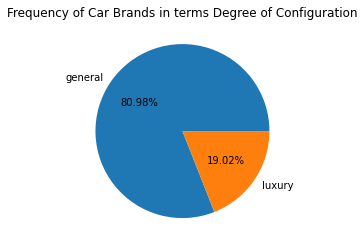

In [15]:
prop_degree = df.groupby('degree', as_index=False)['degree'].value_counts()

plt.pie(prop_degree['count'], labels=prop_degree['degree'], autopct='%.2f%%')
plt.title('Frequency of Car Brands in terms Degree of Configuration');

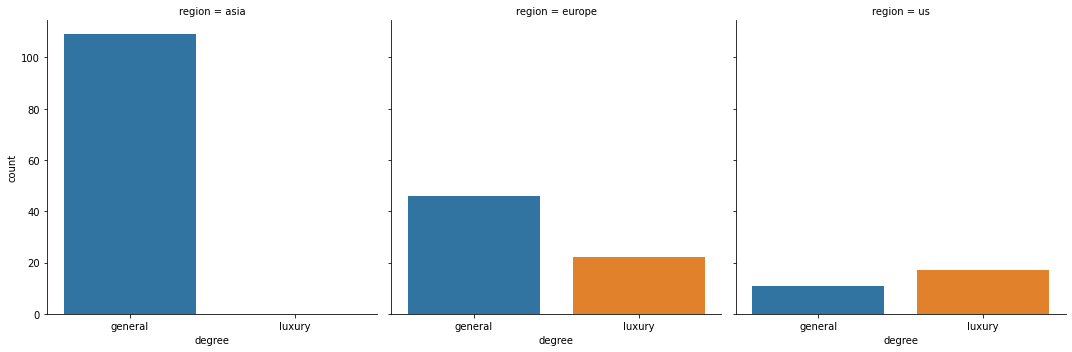

In [16]:
prop_region_degree = df.groupby('region', as_index=False)['degree'].value_counts()
sns.catplot(kind='bar', x='degree', y='count', col='region', data=prop_region_degree)

Generally, there are more cars made for general use than luxury. In terms of demographics, all cars originated in Asia are general brands while the presence of luxury brands are split between in the USA and Europe. To be more specific, majority of the American-based cars in the dataset are luxury cars while European brands lean on the general use cars.

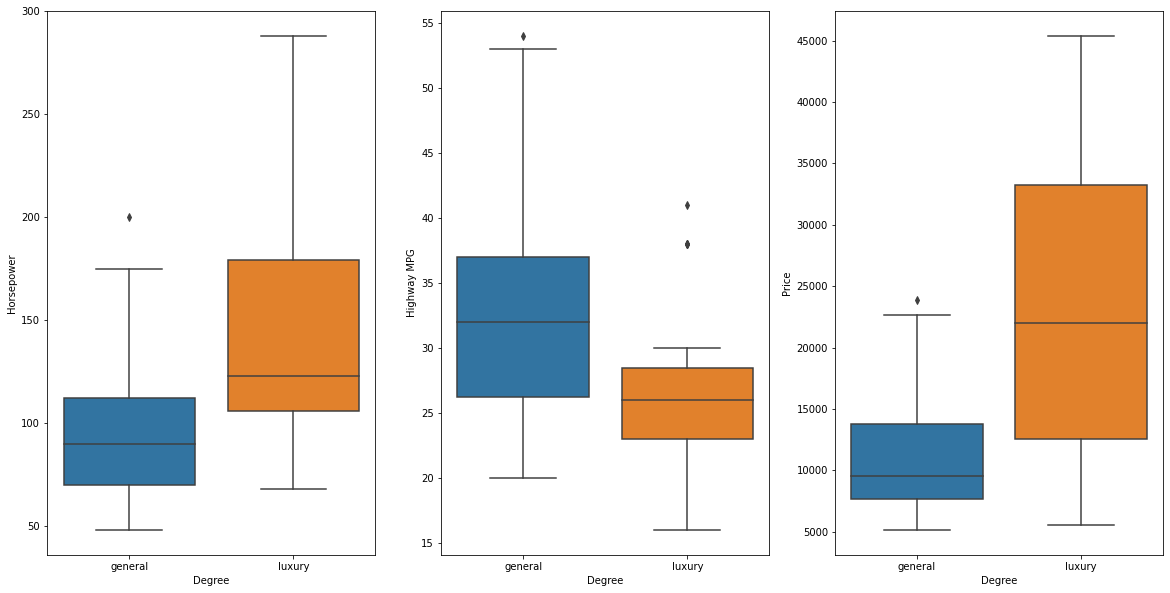

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
sns.boxplot(x='degree', y='horsepower', data=df, ax=axs[0]).set(xlabel='Degree', ylabel='Horsepower');
sns.boxplot(x='degree', y='highwaympg', data=df, ax=axs[1]).set(xlabel='Degree', ylabel='Highway MPG');
sns.boxplot(x='degree', y='price', data=df, ax=axs[2]).set(xlabel='Degree', ylabel='Price');

By the name, general-made cars are made for practicality since it has a low horsepower to provide good mileage. On the other hand, luxury car brands make powerful cars which, in turn, increase the selling price.

## Describing Car Brands in terms of Power-to-Weight Ratio

Horsepower refers to the power or the rate of work an engine produces, while the curb weight indicates the total weight comprising a full tank of gas and all standard equipment. When these two are integrated, it forms a performance metric known as the power-to-weight ratio. This measure indicates how much power the vehicle can produce per unit weight. Therefore, if a car has a higher power output per unit weight than another vehicle, it will be able to accelerate that pound of weight more quickly. 

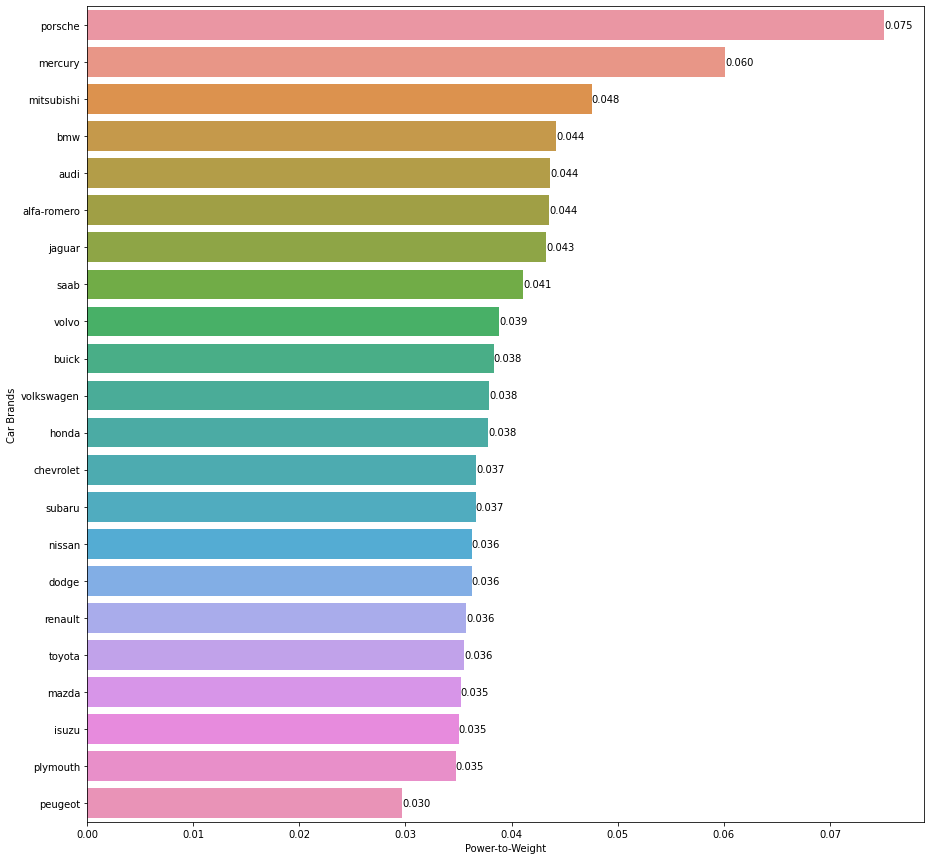

In [18]:
median_carbrand_pwratio = df.groupby('carbrand', as_index=False).median().sort_values(by='power-to-weight', ascending=False)

fig, axs = plt.subplots(figsize=(15,15))
sns.barplot(x='power-to-weight', y='carbrand', orient='h', data=median_carbrand_pwratio).set(xlabel='Power-to-Weight', ylabel='Car Brands');
axs.bar_label(container=axs.containers[0], fmt='%.3f');

The European brand Porsche has the highest ratio at 0.0751 while the European brand Peugeot has the lowest at 0.0297. It is important to note that even though an engine gives off a high horsepower, it will not have a good performance if it will have a weight that compromises the speed of the vehicle

# Understanding Fuel Type

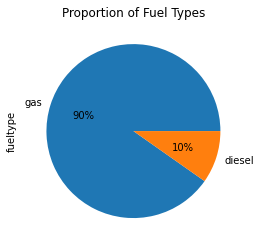

In [19]:
df['fueltype'].value_counts().plot.pie(autopct='%.0f%%')
plt.title('Proportion of Fuel Types');

In general, there are two types of fuel a car can intake: diesel and gas. Engine fueled by gasoline and diesel operate on the same principle: to generate movement by transforming chemical energy from fuel into mechanical energy. The difference then lies on the chemical composition that affects the performance of the vehicle. The dataset contains 90% of gasoline-powered cars while only 10% are diesel-powered since the latter is specifically used for an Indirect Fuel Injection (IDI) Fuel System.

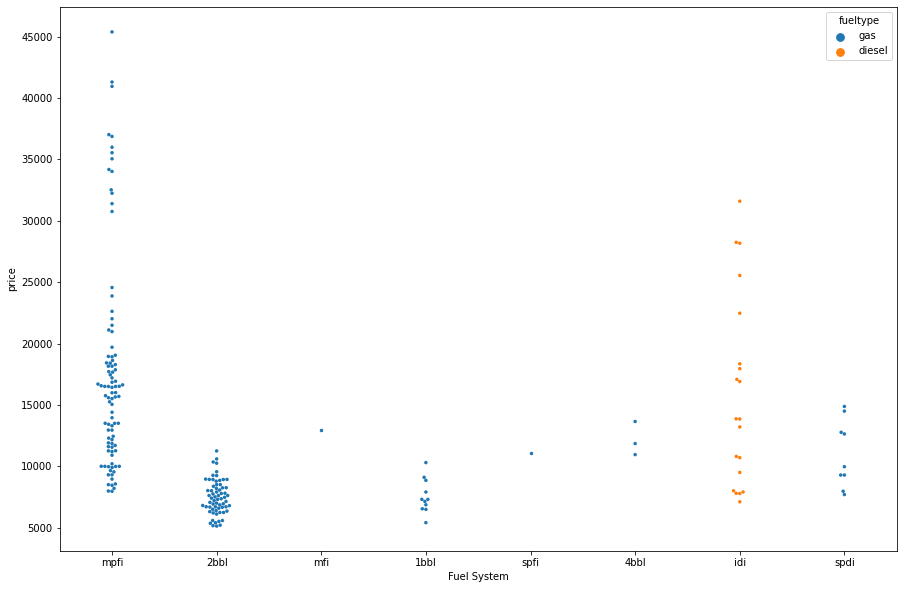

In [20]:
fig, axs = plt.subplots(figsize=(15,10))
sns.swarmplot(x='fuelsystem', y='price', data=df, hue='fueltype', s=3.5).set(xlabel='Fuel System');

Gasoline is more refined than diesel. The volatility of the gasoline lets gasoline-powered expend more energy than cars using diesel. Figure 7 indicates the association between highway mpg and fuel type. Miles per gallon (mpg) indicates the how far a vehicle can travel for every gallon of fuel it uses. In this case, the mpg collected from a highway represents the average fuel efficiency of a vehicle while driving on an open-stretched road without stopping, typically at a higher speed. The higher the mpg, the more fuel-efficient a car is. It can be observed that diesel-powered cars are generally more economical than gas-powered cars. However, the trade-off lies on the price as the former cost about \\$13,900 while the latter cost \\$10,000.

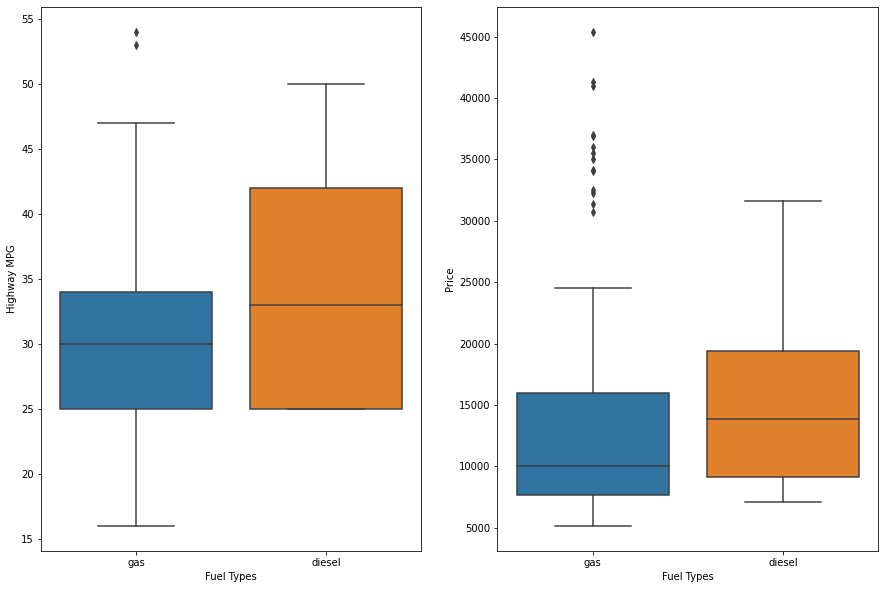

In [21]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
sns.boxplot(x='fueltype', y='highwaympg', data=df, ax=axs[0]).set(xlabel='Fuel Types', ylabel='Highway MPG');
sns.boxplot(x='fueltype', y='price', data=df, ax=axs[1]).set(xlabel='Fuel Types', ylabel='Price');

# Understanding Aspirations

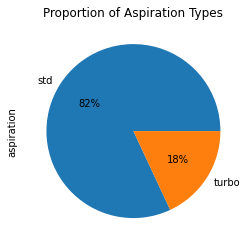

In [22]:
df['aspiration'].value_counts().plot.pie(autopct='%.0f%%');
plt.title('Proportion of Aspiration Types');

In layman’s term, aspiration refers to how engine consumes air for fuel combustion. An internal combustion engine that uses natural aspiration has air intake that is influenced by atmospheric pressure. It does not include any forced induction, and thus, it is reliable to deliver consistent power level. On the other hand, turbocharged aspirations enable engines to pack more air into the cylinders to create a more powerful burn. Given these mechanisms, it would make sense that cars with turbocharged aspiration are usually matched with heavier and larger than cars to exert greater force than standard aspirated cars.

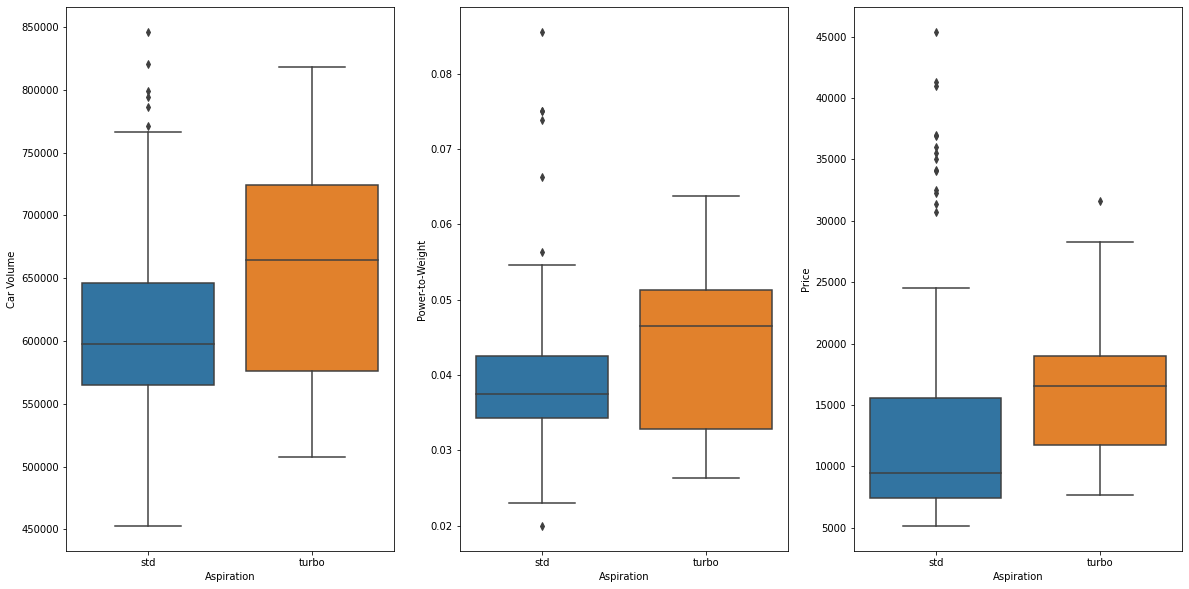

In [23]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
sns.boxplot(x='aspiration', y='carvolume', data=df, ax=axs[0]).set(xlabel='Aspiration', ylabel='Car Volume');
sns.boxplot(x='aspiration', y='power-to-weight', data=df, ax=axs[1]).set(xlabel='Aspiration', ylabel='Power-to-Weight');
sns.boxplot(x='aspiration', y='price', data=df, ax=axs[2]).set(xlabel='Aspiration', ylabel='Price');

Cars having standard (or natural) aspirations are more prevalent at 82% of the entire population while costing less than turbocharged cars at only \\$9,400. Furthermore, turbocharged vehicles are usually larger, having a volume around 665,000 cu. in. while also giving off more power at 0.0466 hp per lb.

# Understanding Car Body

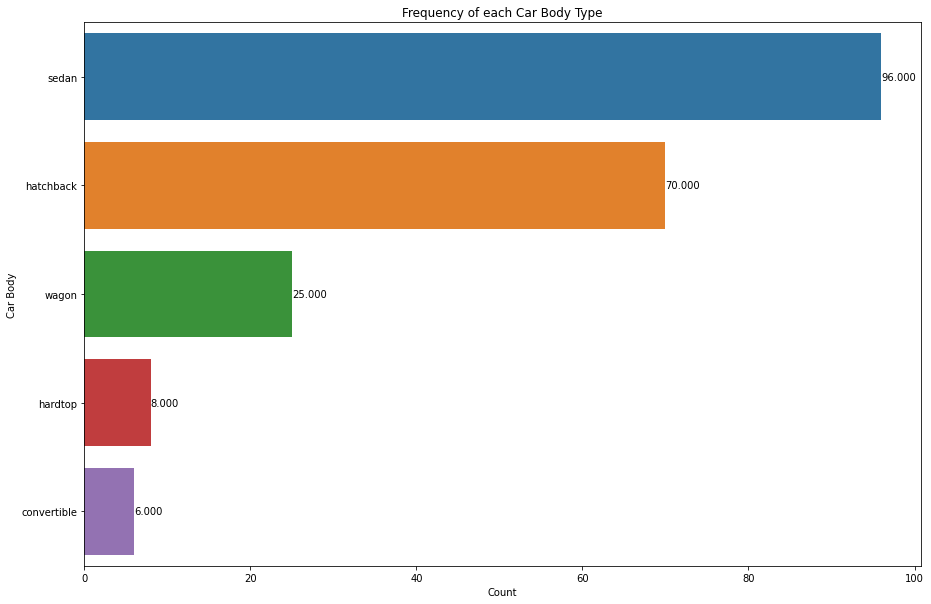

In [24]:
fig, axs = plt.subplots(figsize=(15,10))
sns.countplot(y='carbody', order=df['carbody'].value_counts().index, data=df).set(xlabel='Count', ylabel='Car Body', title='Frequency of each Car Body Type')
axs.bar_label(container=axs.containers[0], fmt='%.3f');

There are four general types of car bodies. 

•	The sedan is described as a four-door passenger vehicle with a trunk distinct from the passenger section.

•	The hatchback is a configuration with a rear door that swings upward to provide access to a cargo area.

•	The wagon is configured slightly larger than sedan and hatchback, with its roof extended rearward over a shared passenger-cargo volume.

•	The hardtop variant has a roof that is often made of metal.

•	The convertible is a passenger car that can be driven with or without a roof in place. 

In terms of car demographics, both hardtop and convertible body types are in the minority while sedans dominate the rest. To be further specific, sedan is typically created by general brands due to its simple, yet effective, configuration for urban areas. Sedans are also the most prevalent model used by European manufacturers. Hatchbacks come to second in favorability as it is a common design by Asian and American companies.


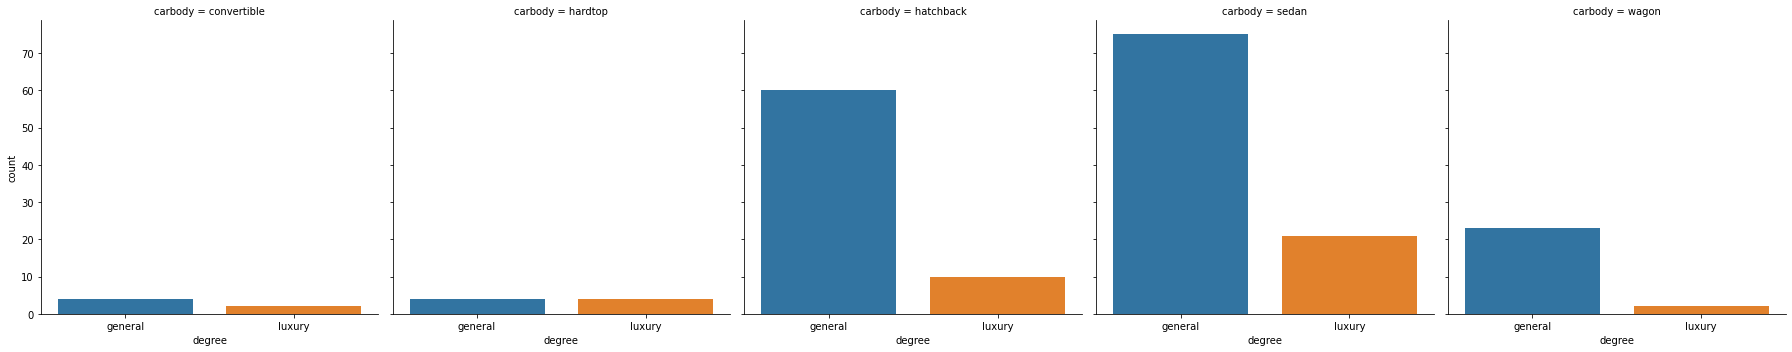

In [25]:
prop_carbody_degree = df.groupby('carbody', as_index=False)['degree'].value_counts()

sns.catplot(kind='bar', x='degree', y='count', col='carbody', data=prop_carbody_degree);

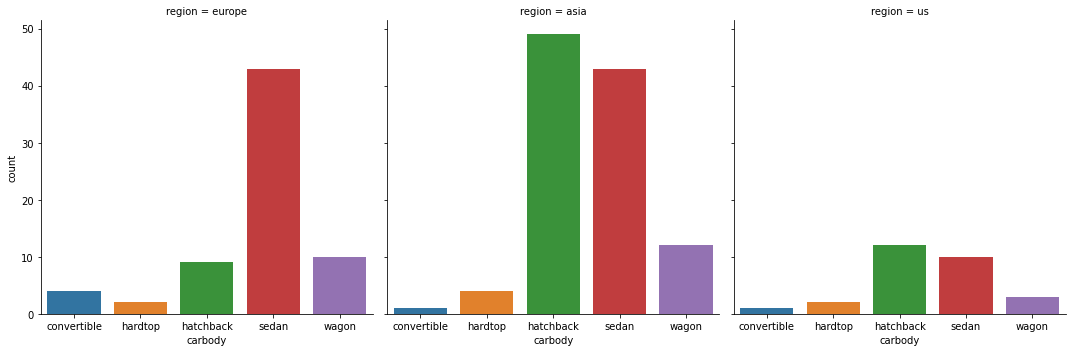

In [26]:
prop_carbody_region = df.groupby('carbody', as_index=False)['region'].value_counts()

sns.catplot(kind='bar', x='carbody', y='count', col='region', data=prop_carbody_region);

Among the four, the hardtop has the highest power-to-weight ratio at 0.0457 while the wagon has the lowest at 0.0347. This metric indicates how much power the vehicle can produce per unit weight. When it comes to price, the most expensive convertible is manufactured by Porsche which has a median price of \\$37,028, a Buick hardtop costs around \\$36,788, and a sedan by Jaguar cost \\$35,550. On the other hand, the cheapest models are hatchbacks manufactured by Chevrolet, Dodge, and Honda which median prices do not exceed \\$7,000. However, in general, hardtops cost the most compared to all body types.

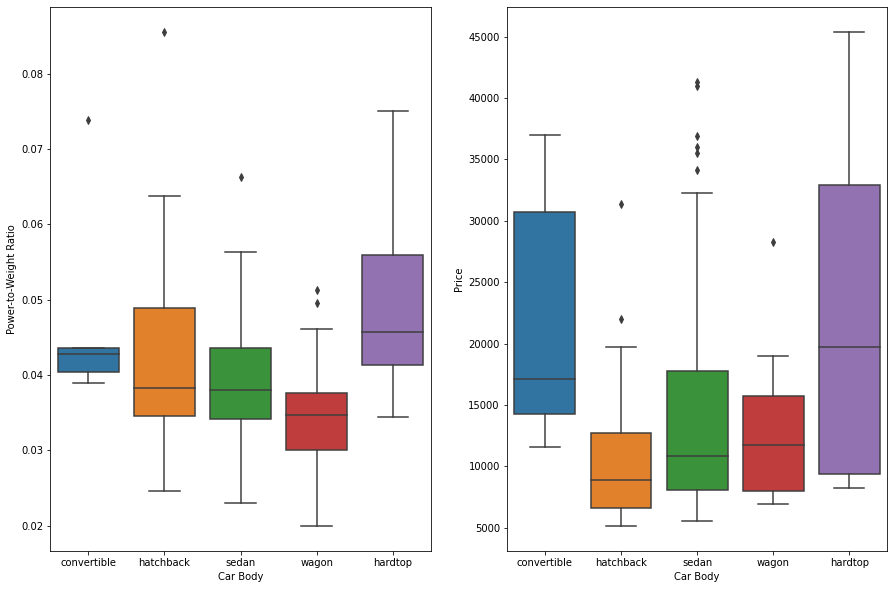

In [27]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
sns.boxplot(x='carbody', y='power-to-weight', data=df, ax=axs[0]).set(xlabel='Car Body', ylabel='Power-to-Weight Ratio');
sns.boxplot(x='carbody', y='price', data=df,  ax=axs[1]).set(xlabel='Car Body', ylabel='Price');

# Understanding Drive Wheel

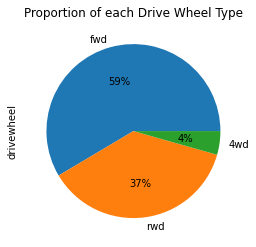

In [28]:
df['drivewheel'].value_counts().plot.pie(autopct='%.0f%%')
plt.title('Proportion of each Drive Wheel Type');

A drive wheel is a component that transmits force, converting torque into tractive force from the tires to the road, allowing the vehicle to move.

•	Front-wheel drive (FWD) use the front wheels to exert power and drive the automobile.

•	Rear-wheel drive (RWD) uses the rear wheels to exert power and drive the automobile.

•	Four-wheel drive (4WD) allows all four road wheels to receive torque from the engine simultaneously.




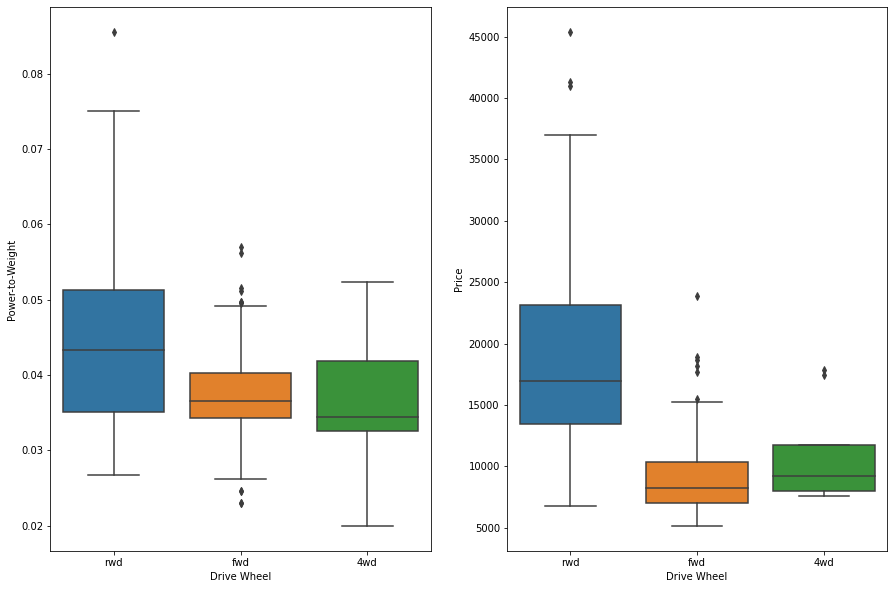

In [29]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
sns.boxplot(x='drivewheel', y='power-to-weight', data=df, ax=axs[0]).set(xlabel='Drive Wheel', ylabel='Power-to-Weight');
sns.boxplot(x='drivewheel', y='price', data=df, ax=axs[1]).set(xlabel='Drive Wheel', ylabel='Price');

Aside from the mechanics and power distribution around the vehicle, the rear-wheel drive system will accelerate faster than an FWD and 4WD car, as the weight of the vehicle is transferred off the front wheels and onto the rear wheels to improve traction. RWD vehicles have the greatest median power-to-weight ratio at 0.04329 while also having a high cost at about $17,000. 

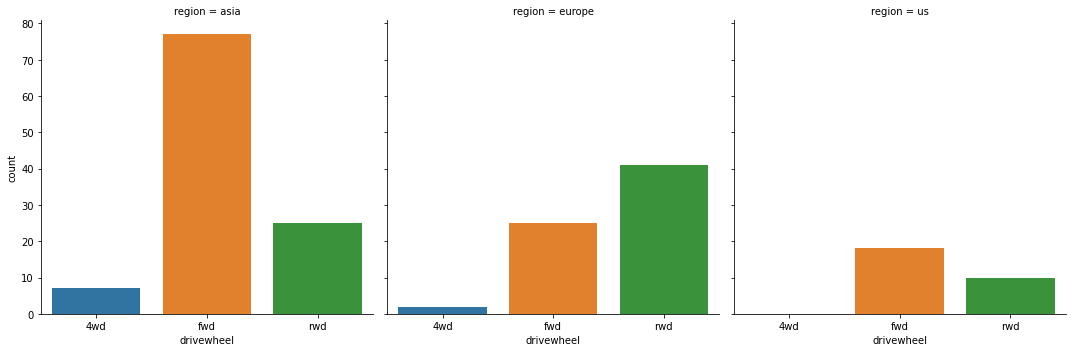

In [30]:
prop_drivewheel_region = df.groupby('drivewheel', as_index=False)['region'].value_counts()

sns.catplot(kind='bar', x='drivewheel', y='count', col='region', data=prop_drivewheel_region);

In terms of demographics, Asian and American brands are usually in FWD while European brands have RWD. It can be noticed how rare a 4WD mechanism, especially having none installed in American brands.

# Understanding Symbolling

Symbolling is a process that allocates a risk factor symbol to a vehicle with respect to the pricing. The symbol is then modified by moving it up (or down) the scale if it is more dangerous (or less risky). 

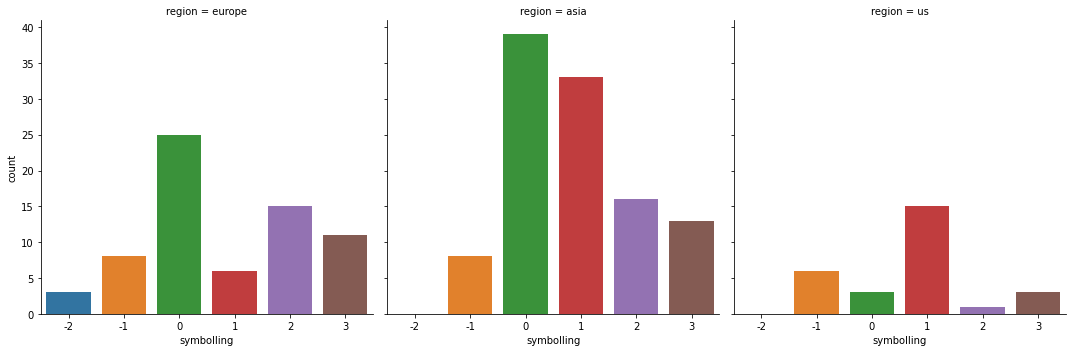

In [31]:
prop_symbolling_region = df.groupby('region', as_index=False)['symbolling'].value_counts().sort_values(by='symbolling')

sns.catplot(kind='bar', x='symbolling', y='count', col='region', data=prop_symbolling_region)

A rating of +3 suggests that the vehicle is risky, while a value of -3 indicates that it is most likely safe. Among the regions, both Asian and European brands are mainly comprised by cars of 0 rating, but the frequency of +1 rated Asian vehicles is significant. On the other hand, American brands usually have a +1 rating.

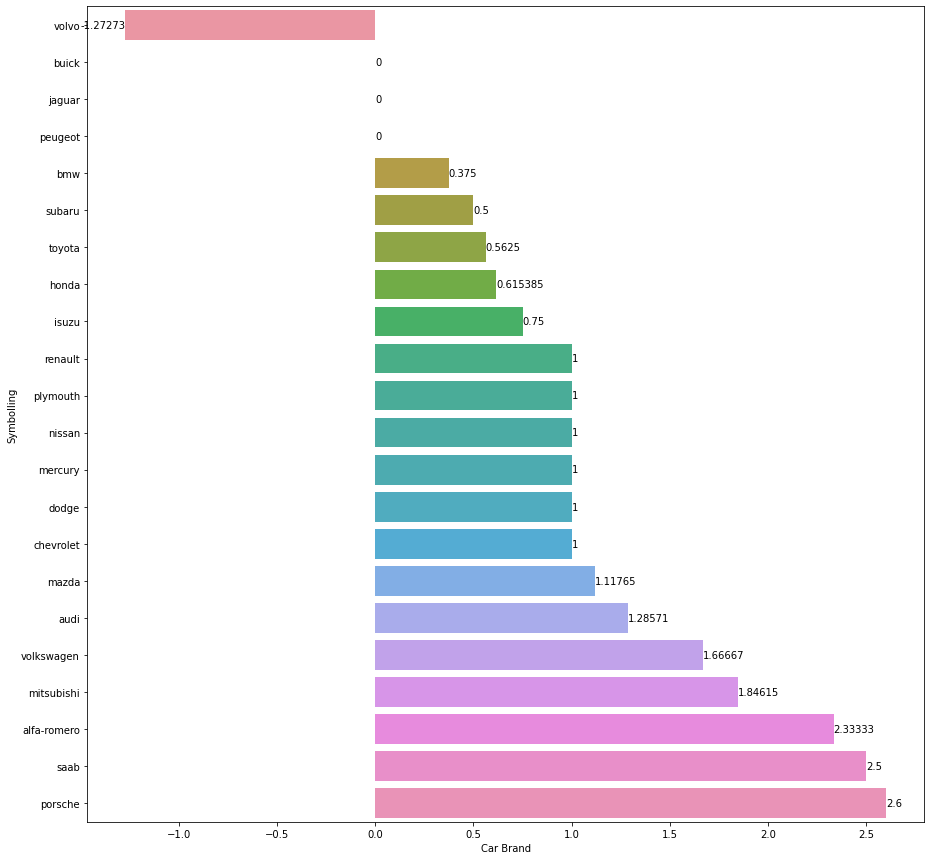

In [32]:
prop_carbrand_symbolling = df.groupby('carbrand', as_index=False)['symbolling'].mean().sort_values(by='symbolling')

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15,15))
sns.barplot(x='symbolling', y='carbrand', data=prop_carbrand_symbolling, orient='h').set(xlabel='Car Brand', ylabel='Symbolling')
axs.bar_label(container=axs.containers[0]);

In terms of car brands, Volvo has been assessed as the safest with a rating of -1.273 and Porsche is the riskiest with 2.6. It is known that the Porsche brand has the highest horsepower while also having cars that are smaller in size. On the other end, Volvo has a relatively bigger volume, larger weight, and fair fuel economy.

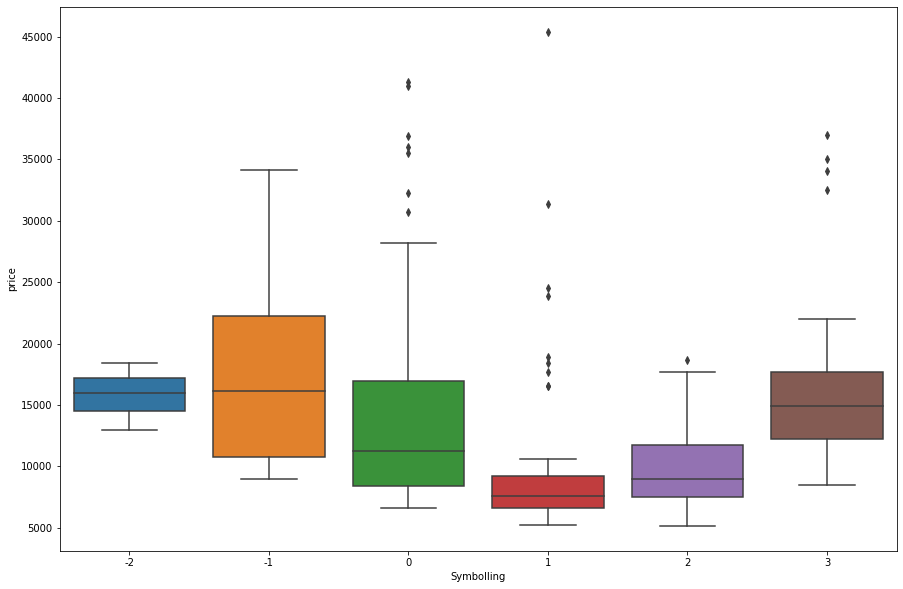

In [33]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15,10))
sns.boxplot(x='symbolling', y='price', data=df).set(xlabel='Symbolling');

In terms of prices, cars scored less than or equal to 0 generally have a higher price than those rated +1 to +3. On the other end, the lowest median price is $7,554 which are cars rated +1. 

# Understanding the Engine

A system designed to transform one or more sources of energy into mechanical energy is known as an engine. Modern engines have various designs and capabilities; however, they all follow the same principle: suck in fuel and air, compress the mixture into the cylinder, utilize a catalyst to ignite the mixture, and expel the exhaust.

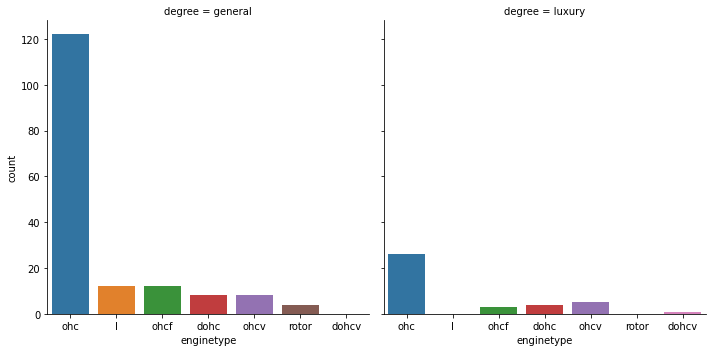

In [34]:
prop_enginetype_degree = df.groupby('degree', as_index=False)['enginetype'].value_counts()

sns.catplot(kind='bar', x='enginetype', y='count', col='degree', data=prop_enginetype_degree);

The dataset is mainly dominated by the Overhead Camshaft engine. To simply put, this is a piston engine with the camshaft placed above the combustion chamber in the cylinder head. Its early variation, the overhead camshaft valve engines (OHCV), has the camshaft situated underneath the combustion chamber in the engine block. The distinctions that make cars with OHC prevalent is the efficient fuel economy and relatively low price.

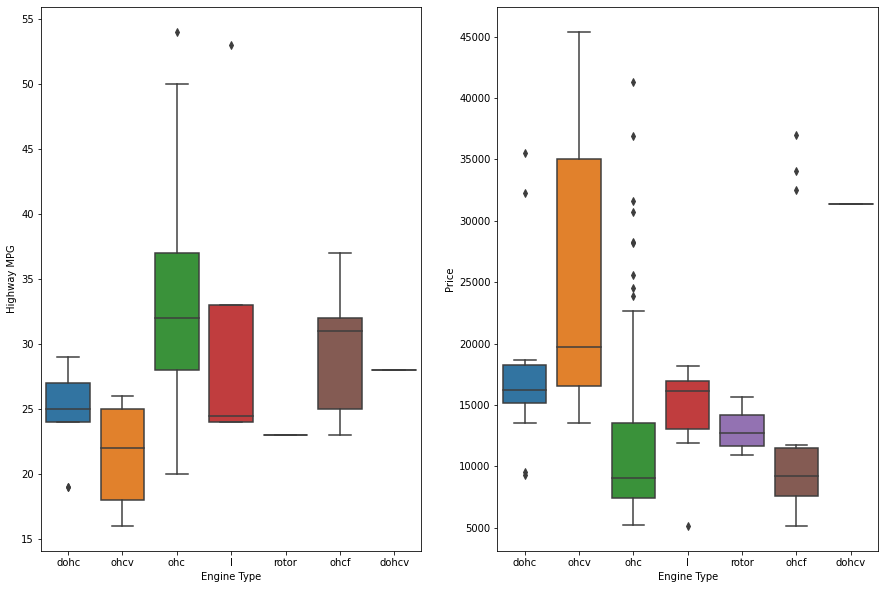

In [35]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
sns.boxplot(x='enginetype', y='highwaympg', data=df, ax=axs[0]).set(xlabel='Engine Type', ylabel='Highway MPG');
sns.boxplot(x='enginetype', y='price', data=df, ax=axs[1]).set(xlabel='Engine Type', ylabel='Price');

## Describing engines in terms of Fuel System

Going into the inner mechanisms, the fuel system oversees the delivery of gasoline to the engine as needed. To achieve the required vehicle performance and dependability, the fuel tank, pump, filter, and carburetor must work flawlessly. The dataset shows the 2bbl fuel system has the best fuel efficiency by having a median consumption of 32 mpg. Moreover, this particular system is usually implemented by OHC, OHCF, and L types of engines.

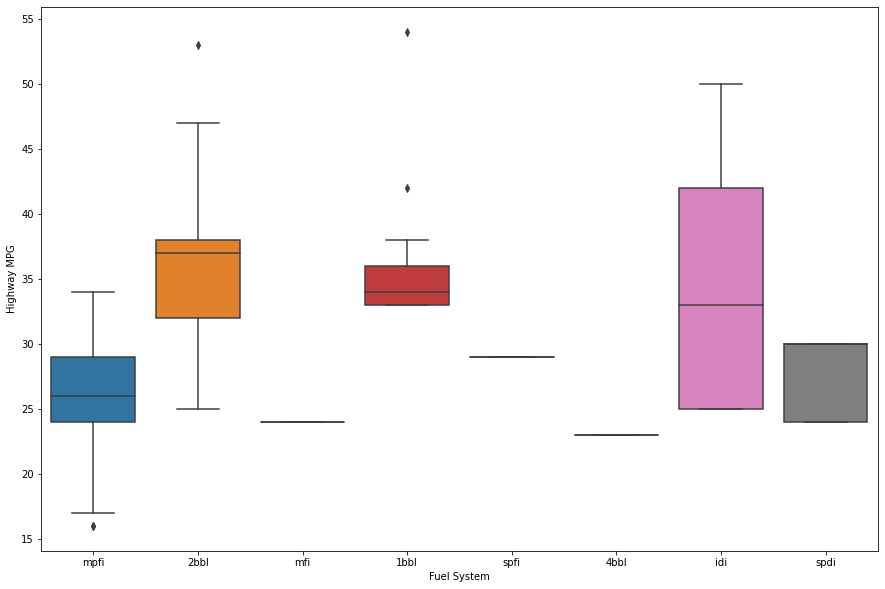

In [36]:
prop_fuelsystem_enginetype = df.groupby('fuelsystem', as_index=False)['enginetype'].value_counts()

fig, axs = plt.subplots(figsize=(15,10))
sns.boxplot(x='fuelsystem', y='highwaympg', data=df).set(xlabel='Fuel System', ylabel='Highway MPG');

## Describing engines in terms of sizes

Finally, engine sizes also influence how the car perform. As implied in the dataset, cars that uses diesel for power requires a larger engine size. By the same token, turbocharged vehicles have a larger engine size than standard aspirated cars. 

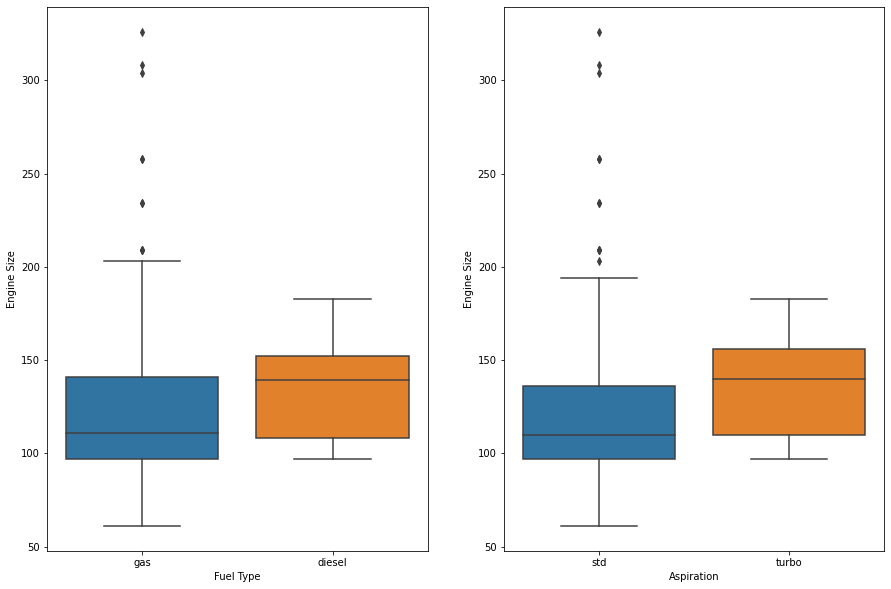

In [37]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
sns.boxplot(x='fueltype', y='enginesize', data=df, ax=axs[0]).set(xlabel='Fuel Type', ylabel='Engine Size')
sns.boxplot(x='aspiration', y='enginesize', data=df, ax=axs[1]).set(xlabel='Aspiration', ylabel='Engine Size')
plt.show()

# Preprocessing

In [38]:
df['symbolling'].replace({-2: 'neg 2',
                          -1: 'neg 1',
                          0: '0',
                          1: '1',
                          2: '2',
                          3: '3'}, inplace=True)

In [39]:
numerics = df.select_dtypes(['float64', 'int64']).columns.to_list()

categories = df.select_dtypes(['object']).columns.to_list()

In [40]:
scaler = StandardScaler()
df[numerics] = scaler.fit_transform(df[numerics])

# Correlation

In its simplest form, correlation refers to the dependence of any statistical relationship between two variables. Pearson Correlation is the most common method in Python (even in Statistics) to detect associations between continuous variables. However, one limitation of this algorithm is that it does not account for any categorical variables. But if these variables had been transformed to numerical attributes, applying the Pearson Correlation onto these modified values will not make sense. It is important to ascertain the proper implementation of various correlation methods to preserve the soundness of calculations and the logic of the statistical concept. Alternatively, Cramer’s V is applied solely for categorical variables within the dataset. In addition, a heatmap is created to ease the understanding of the relationships across all attributes.

In statistics, both the Pearson Correlation Cramer’s V have established ranges to classify the degree of association between variables. For continuous variables, pairs with a coefficient of more than 0.70 will be delegated for removal depending on the behavior of the coefficient of determination. By the same token, the threshold for categorical variables is 0.50.

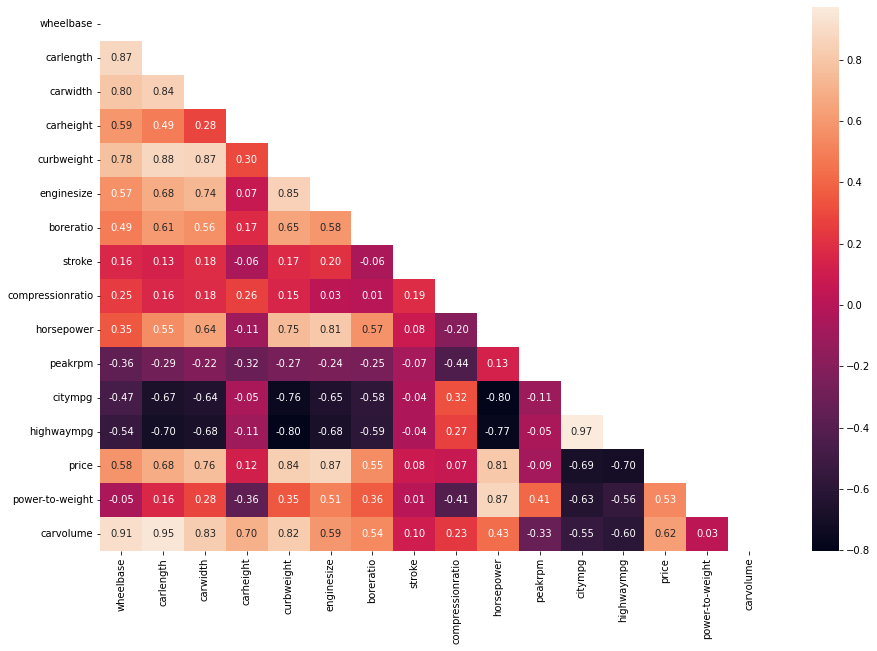

In [41]:
num_corr = df[numerics].corr()
num_mask = np.triu(num_corr)

fig, axs = plt.subplots(figsize=(15,10))
sns.heatmap(num_corr, annot=True, fmt=".2f", mask=num_mask);

As shown above, the highest coefficient of 0.97 is achieved with the correlation between city mpg and highway mpg. This makes sense as both metrics pertain to fuel economy but only differs on how each are measured. In terms of the target variable, car length and width (and volume) have a strong positive relation towards price, while engine size and horsepower indicate very strong positive correlation with price. At the other end, both mpg metrics have a strong negative correlation with price.

The purpose of this section is to detect and eliminate multicollinearity. When dealing with multiple attributes, multicollinearity is a statistical concept where several independent variables in a model are correlated. And its presence in a model may lead to overfitting, instability of coefficients, and inaccurate predictions. Generally, feature engineering is suggested to efficiently reduce the number of multicollinear attributes, all the while maintaining semantics and logic. For instance, horsepower and curb weight have high positive correlations with engine size at 0.81 and 0.85, respectively.  But, when the two former attributes are integrated to produce a new metric, the power-to-weight ratio, the correlation with engine size dropped to 0.51. The power-to-weight ratio is a known measurement of actual performance of any engine or power source by dividing the horsepower to the vehicle weight.

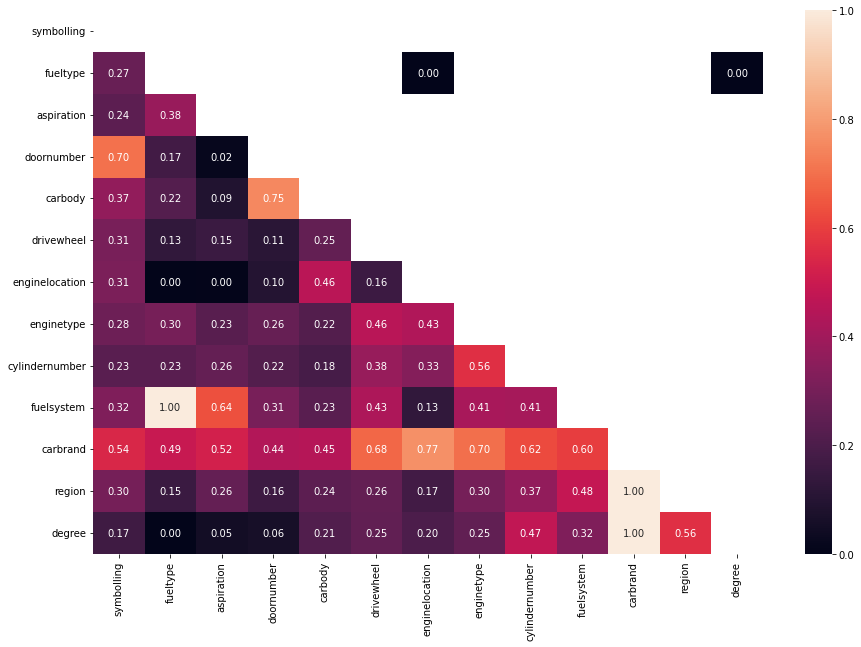

In [42]:
def cramer_v(x, y):
    cross = pd.crosstab(x, y, rownames=None, colnames=None).to_numpy()
    stat = chi2_contingency(cross)[0]
    obs = np.sum(cross)
    mini = min(cross.shape) - 1
    return np.sqrt(stat / (obs * mini))


rows = []
for var1 in categories:
    col = []
    for var2 in categories:
        corr = cramer_v(df[var1], df[var2])
        col.append(corr)
    rows.append(col)
corr_results = np.array(rows)
cat_corr = pd.DataFrame(corr_results, columns=categories, index=categories)
cat_mask = np.triu(cat_corr)

fig, axs = plt.subplots(figsize=(15,10))
sns.heatmap(cat_corr, annot=True, fmt=".2f", mask=cat_mask);

On the other hand, the brand exhibits a perfect correlation with the region of production and degree of luxuriousness. This makes sense as the latter two have been derived and included in data analysis for further exploration. The type of fuel also shows a perfect association with fuel system. In the previous sections, it was shown that an engine having an Indirect Fuel Injection only uses diesel, while all others rely on gas. 

Ideally, all explanatory variables must be independent. Multicollinearity should be reduced or, if possible, eliminated. However, one must not be rash in excluding variables from the model. It is recommended to observe the behavior of the model as multicollinear features are being inserted and removed one at a time.

# Model Creation and Evaluation

Four types of regressors will be observed to identify which produces the best coefficient of determinationa and a low mean-squared error for the test set. 

In essence, the procedure is conducted with four parts:
1. **Eliminating Multicollinearity**: This is initially done by dropping highly correlated variables through a series of trial and error, aiming to increase the coefficient of determination as much as possible. Furthermore, a metric known as VIF (or, Variance Inflation Factor) will be checked as it is a more reliable, quantified indicator of multicollinearity among *numeric* variables. A VIF of less than 5 for numeric variables is required to interpret a nonmulticollinear feature. However, a high VIF among *categorical* variables can be safely disregarded. 

2. **Train and Test Set Split**: For any machine learning procedure, the general dataset will be split into two groups for training and testing. However, the key difference is that the basis for success of the model will be seen through the *test set*, not the train set. 

3. **Feature Selection**: For this report, this concept will be applied to Linear and Random Forest Regression. Recursive Feature Elimination (RFE) is a method that removes any insignificant features for model building - mainly for Linear Regression. On the other hand, Random Forest Regression has its own in-built feature importance ranking that outputs the score of the feature against the model.

4. **Model Creation and Evaluation**: After creating the model, the RMSE will be the metric used to assess the quality of the model. 

## Eliminating Multicollinearity

In [43]:
df.drop(['power-to-weight', 'carvolume', 'wheelbase', 'citympg',
         'fuelsystem', 'region', 'degree', 'doornumber', 'aspiration'], axis=1, inplace=True)

df = pd.get_dummies(df, columns=df.select_dtypes(['object']).columns.to_list(), drop_first=True)

One must note that the selection of which variables to drop are done through a series of trial and error, all the while observing the behavior of the coefficients of determination on the succeeding section.

In [44]:
df

,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,...,carbrand_nissan,carbrand_peugeot,carbrand_plymouth,carbrand_porsche,carbrand_renault,carbrand_saab,carbrand_subaru,carbrand_toyota,carbrand_volkswagen,carbrand_volvo
0,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,...,0,0,0,0,0,0,0,0,0,0
1,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,...,0,0,0,0,0,0,0,0,0,0
2,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,...,0,0,0,0,0,0,0,0,0,0
3,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,...,0,0,0,0,0,0,0,0,0,0
4,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.198549,1.398245,0.728239,0.763241,0.339248,1.666445,-0.336970,-0.162161,0.250533,0.577692,...,0,0,0,0,0,0,0,0,0,1
201,1.198549,1.351515,0.728239,0.949992,0.339248,1.666445,-0.336970,-0.364062,1.416637,0.367529,...,0,0,0,0,0,0,0,0,0,1
202,1.198549,1.398245,0.728239,0.878757,1.109571,0.926204,-1.232021,-0.338824,0.757535,0.787855,...,0,0,0,0,0,0,0,0,0,1
203,1.198549,1.398245,0.728239,1.273437,0.435538,-1.183483,0.462183,3.244916,0.047732,-0.683286,...,0,0,0,0,0,0,0,0,0,1


## Train and Test Sets

In [45]:
X = df.drop(['price'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
X

,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,...,carbrand_nissan,carbrand_peugeot,carbrand_plymouth,carbrand_porsche,carbrand_renault,carbrand_saab,carbrand_subaru,carbrand_toyota,carbrand_volkswagen,carbrand_volvo
0,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,...,0,0,0,0,0,0,0,0,0,0
1,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,...,0,0,0,0,0,0,0,0,0,0
2,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,...,0,0,0,0,0,0,0,0,0,0
3,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,...,0,0,0,0,0,0,0,0,0,0
4,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.198549,1.398245,0.728239,0.763241,0.339248,1.666445,-0.336970,-0.162161,0.250533,0.577692,...,0,0,0,0,0,0,0,0,0,1
201,1.198549,1.351515,0.728239,0.949992,0.339248,1.666445,-0.336970,-0.364062,1.416637,0.367529,...,0,0,0,0,0,0,0,0,0,1
202,1.198549,1.398245,0.728239,0.878757,1.109571,0.926204,-1.232021,-0.338824,0.757535,0.787855,...,0,0,0,0,0,0,0,0,0,1
203,1.198549,1.398245,0.728239,1.273437,0.435538,-1.183483,0.462183,3.244916,0.047732,-0.683286,...,0,0,0,0,0,0,0,0,0,1


In [47]:
y

0      0.027391
1      0.404461
2      0.404461
3      0.084485
4      0.523668
         ...   
200    0.447752
201    0.723810
202    1.029983
203    1.153582
204    1.173031
Name: price, Length: 205, dtype: float64

## Linear Regression

In [48]:
lin_reg = LinearRegression()
lin_model = lin_reg.fit(X_train, y_train)

### RFE and VIF

In [49]:
rfe = RFE(lin_model, n_features_to_select=15)
rfe.fit(X_train, y_train)
rfe_rank = list(zip(X_train.columns, rfe.support_, rfe.ranking_))
feat_in_support = X_train.columns[rfe.support_]
print(feat_in_support)

Index(['curbweight', 'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_twelve', 'cylindernumber_two', 'carbrand_bmw',
       'carbrand_buick', 'carbrand_jaguar', 'carbrand_porsche',
       'carbrand_renault', 'carbrand_subaru'],
      dtype='object')


In [50]:
X_train_lr = X_train[feat_in_support]
X_train_lrc = sm.add_constant(X_train_lr)
lin_reg_lr = sm.OLS(y_train, X_train_lrc).fit()
print(lin_reg_lr.summary())

vif = pd.DataFrame()
vif['Feature'] = X_train_lr.columns
vif['VIF'] = [variance_inflation_factor(X_train_lr.values, i) for i in range(X_train_lr.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     135.5
Date:                Sat, 04 Mar 2023   Prob (F-statistic):           2.28e-78
Time:                        13:56:24   Log-Likelihood:                -6.9360
No. Observations:                 164   AIC:                             45.87
Df Residuals:                     148   BIC:                             95.47
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.22

So far, the linear model for the training set is adequate with a good adjusted coefficient of determination of 0.925 and minimal multicollinearity as shown in the VIF data frame.

### Evaluation

In [51]:
X_test_lr = sm.add_constant(X_test)
X_test_new = X_test_lr[X_train_lrc.columns]
y_test_predict = lin_reg_lr.predict(X_test_new)
print(f'model : {lin_reg} and  RMSE score is : {round(np.sqrt(mean_squared_error(y_test, y_test_predict)), 4)}, r2 score is {round(r2_score(y_test, y_test_predict), 4)}')

model : LinearRegression() and  RMSE score is : 0.3879, r2 score is 0.879


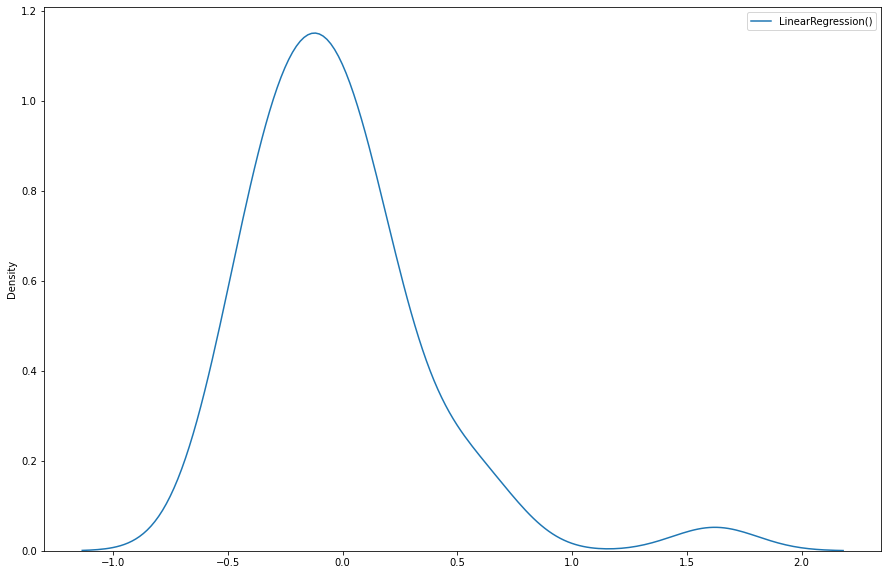

In [52]:
y_test_predict = lin_reg_lr.predict(X_test_new)
fig, axs = plt.subplots(figsize=(15,10))
sns.kdeplot((y_test - y_test_predict), label=lin_reg)
plt.legend()

## Random Forest Regression

### Hyperparameter Tuning

In [53]:
parameters ={'n_estimators':[int(x) for x in np.linspace(start=100, stop=500, num=10)],
             'max_depth':[2, 4, 6],
             'min_samples_split':[2, 4, 6],
             'min_samples_leaf':[1, 2, 3]
            }

In [54]:
rf_reg = RandomForestRegressor(random_state=42)

In [55]:
rf_Grid = GridSearchCV(estimator=rf_reg, param_grid=parameters, cv=5, verbose=3)

In [56]:
rf_Grid.fit(X_train, y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.814 total time=   0.2s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.896 total time=   0.2s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.676 total time=   0.2s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.904 total time=   0.2s
[CV 5/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.879 total time=   0.4s
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=144;, score=0.812 total time=   0.8s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=144;, score=0.899 total time=   0.5s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=144;, score=0.678 total time=   1.4s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [2, 4, 6], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 144, 188, 233, 277, 322, 366,
                                          411, 455, 500]},
             verbose=3)

In [57]:
rf_Grid.best_params_

{'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

### Evaluation

In [58]:
rf_reg = RandomForestRegressor(n_estimators=500, max_depth=6, min_samples_leaf=1, min_samples_split=2, random_state=42)
rf_reg.fit(X_train, y_train)
y_test_predict = rf_reg.predict(X_test)
print(f'model : {rf_reg} and  RMSE score is : {round(np.sqrt(mean_squared_error(y_test, y_test_predict)), 4)}, r2 score is {round(r2_score(y_test, y_test_predict), 4)}')

model : RandomForestRegressor(max_depth=6, n_estimators=500, random_state=42) and  RMSE score is : 0.2399, r2 score is 0.9537


<AxesSubplot:xlabel='price', ylabel='Density'>

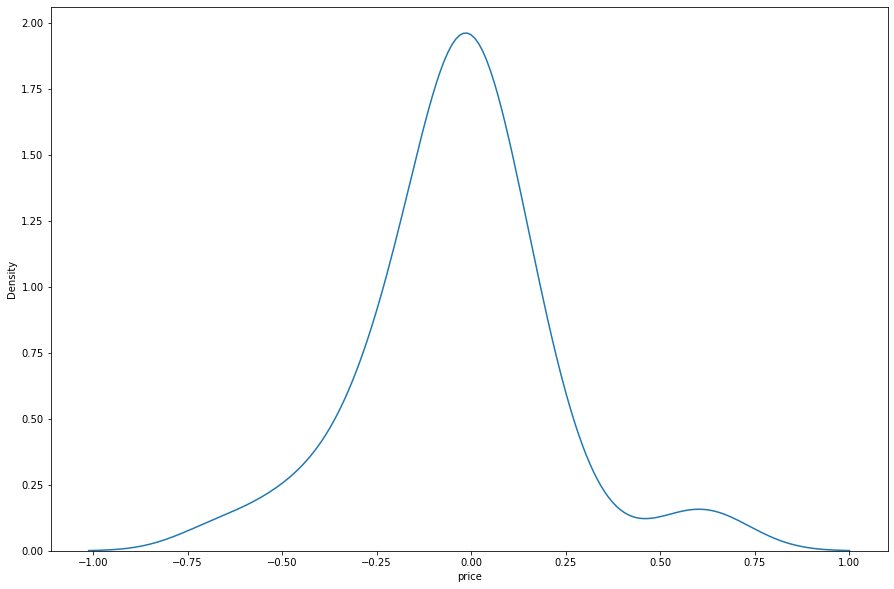

In [59]:
fig, axs = plt.subplots(figsize=(15,10))
sns.kdeplot((y_test - y_test_predict))

## Other Models: Ridge and Lasso

In [60]:
rid_reg = Ridge()

model : Ridge() and  RMSE score is : 0.3631, r2 score is 0.8939
model : Lasso() and  RMSE score is : 1.1154, r2 score is -0.0009


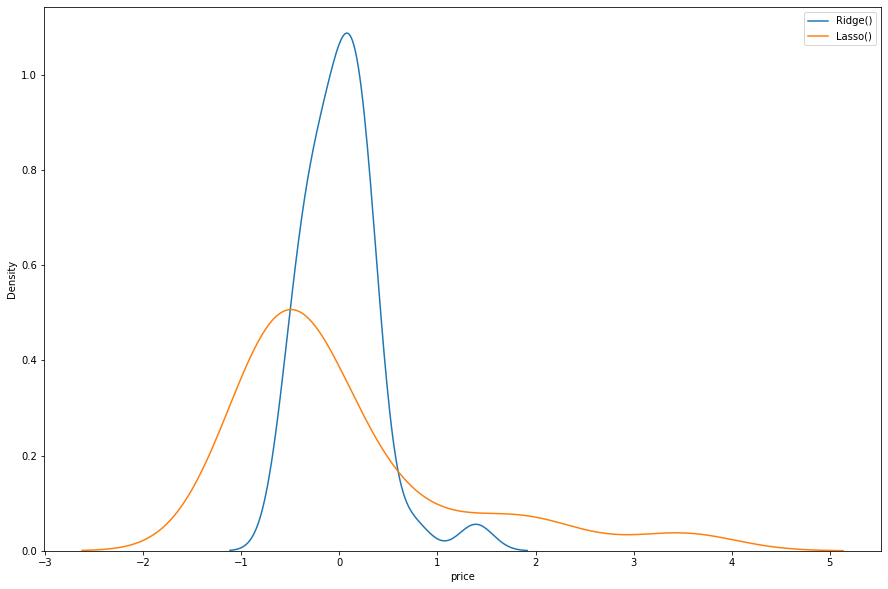

In [61]:
fig, axs = plt.subplots(figsize=(15,10))

rid_reg.fit(X_train, y_train)
y_test_predict = model.predict(X_test)
print(f'model : {model} and  RMSE score is : {round(np.sqrt(mean_squared_error(y_test, y_test_predict)), 4)}, r2 score is {round(r2_score(y_test, y_test_predict), 4)}')
sns.kdeplot((y_test - y_test_predict), label=model)
plt.legend()

Among the four models, the Linear Regressor yields the lowest r2 score and a relatively high RMSE for the test set despite having a good initial standing. On the other hand, the best model is associated with the Random Forest Regressor with an RMSE score of around 1900 and an r2 score of 0.9537. 

Generally, all four regressors approximate normality with respect to the residuals.

# Important Features

In [62]:
important_features = []
important_features_score = []
for i in range(len(rf_reg.feature_importances_)):
    if rf_reg.feature_importances_[i] > 0.001:
        important_features.append(X_train.columns[i])
        important_features_score.append(round(rf_reg.feature_importances_[i], 3))

df_feature_ranking = pd.DataFrame({'feature': important_features, 'score': important_features_score}).sort_values('score', ascending=False)
print(df_feature_ranking)

                feature  score
4            enginesize  0.597
3            curbweight  0.253
10           highwaympg  0.060
8            horsepower  0.026
1              carwidth  0.014
0             carlength  0.009
13         carbrand_bmw  0.008
9               peakrpm  0.006
5             boreratio  0.004
6                stroke  0.004
2             carheight  0.003
7      compressionratio  0.003
11         symbolling_1  0.002
12  cylindernumber_four  0.002


With regards to relevant attributes for automobiles, the Random Forest Regressor indicates that the **engine size, curb weight, highway MPG, horsepower, and car width** are the five top features that car companies should look out for in the market.